#### Imports

In [2]:
import os
import re
import sys
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

In [3]:
sys.path.append('..')

In [4]:
from src.utils.image_utils import load_czi_images, enhance_cell_image_contrast
from src.utils.plot_utils import show_3d_segmentation_overlay
from src.track import *
from cell_tracking import get_masks_paths



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.5.dev16+g79b0fcb 
platform:       	linux 
python version: 	3.12.9 
torch version:  	2.7.1+cu126! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




#### Functions

#### Inputs

In [5]:
czi_file_path = '/home/dafei/data/MS2/gRNA2_12.03.25-st-13-II---.czi'
seg_maps_dir = '/home/dafei/output/MS2/3d_cell_segmentation/gRNA2_12.03.25-st-13-II---/masks'

#### Debug

In [8]:
image_data = load_czi_images(czi_file_path)

Successfully loaded /home/dafei/data/MS2/gRNA2_12.03.25-st-13-II---.czi
data shape: (1, 80, 2, 9, 1024, 1024, 1)


In [29]:
img0 = enhance_cell_image_contrast(image_data[0,0,1,:,:,:,0])
img1 = enhance_cell_image_contrast(image_data[0,1,1,:,:,:,0])
img2 = enhance_cell_image_contrast(image_data[0,2,1,:,:,:,0])
img3 = enhance_cell_image_contrast(image_data[0,3,1,:,:,:,0])

In [6]:
masks_paths = get_masks_paths(seg_maps_dir)

In [26]:
mask0 = np.load(masks_paths[0])['masks']
mask1 = np.load(masks_paths[1])['masks']
mask2 = np.load(masks_paths[2])['masks']
mask3 = np.load(masks_paths[3])['masks']

In [ ]:
cell_mask0 = (mask0 == 46).astype(np.uint8)
cell_mask1 = (mask1 == 53).astype(np.uint8)

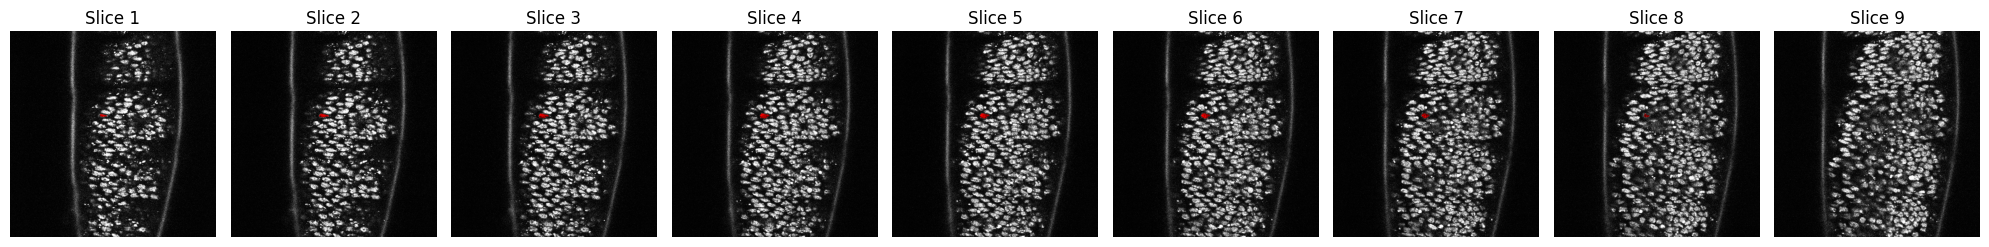

In [19]:
show_3d_segmentation_overlay(img1, cell_mask1)

In [31]:
np.unique(cell_mask1*mask3)

array([ 0, 51], dtype=uint16)